In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))
from src.definitions import EXTERNAL_DATA_FOLDER, RAW_DATA_FOLDER

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(EXTERNAL_DATA_FOLDER / '10000generated_balanced.csv')
df['techniques'] = df['techniques'].str.replace(" ", ", ")

df

,id,content,lang,manipulative,techniques,trigger_words
0,7d4cd781-574c-4493-aa18-494a85ef2ac9,"Они уже здесь. Тихо подкрадываются, маскируяс...",ru,True,['appeal_to_fear'],['враг' 'угроза' 'дети' 'преступность' 'деваль...
1,338246ff-6bb8-432e-9a63-880a1e13a64b,⚠ **ВНИМАНИЕ! НАША СТРАНА В ОПАСНОСТІ!** ⚠\n\n...,ru,True,"['glittering_generalities', 'appeal_to_fear', ...",['опасность' 'ворог' 'зла' 'хаос' 'беззаконня'...
2,b28dbb0a-0e44-40dc-9f00-b7fe66c92608,Вже мільйони українців відчули на собі руйнівн...,uk,True,"['bandwagon', 'cliche', 'cherry_picking']","['війна' 'діти' ""обов'язок"" 'перемога' 'ЗСУ' '..."
3,1bad7927-fac5-427b-9afb-7dca2eb0dce9,Вже всі розуміють: війна затягується. **Все н...,uk,True,"['fud', 'cliche', 'bandwagon']",['втрати' 'резервів' 'пропаганда' 'тікатимуть'...
4,7ebce36f-f4e7-48fd-999c-360988dfeed4,"Слухи о том, что мобилизация в Украине идет пл...",ru,True,"['cherry_picking', 'whataboutism', 'cliche']",['мобилизация' 'война' 'предатели' 'Россия' 'З...
...,...,...,...,...,...,...
9995,74c96e40-6228-4bd3-a0ea-12ca6d9d4a76,Жахливі кадри з окупованих територій шокують с...,uk,True,['loaded_language'],['знищують' 'звірячі' 'варварство' 'безкарніст...
9996,a7a09e92-e922-4297-b28c-eb6f482f2c96,Україна перемагає! Чуєте цей неймовірний гул ...,uk,True,"['euphoria', 'bandwagon', 'straw_man']",['перемога' 'розгром' 'окупанти' 'ЗСУ' 'дезінф...
9997,1273f193-bd5b-416e-9231-8ce3ff3df013,Шокуюча правда про «європейські цінності»! Пі...,ru,True,"['straw_man', 'cliche']",['ЛГБТ-ідеологія' 'традиційні цінності' 'розкл...
9998,1b9bbfe2-4dbc-462a-9b36-c1971c9a355a,Вже всі розуміють: ця війна – це катастрофа! ...,uk,True,"['cliche', 'straw_man', 'bandwagon']",['війна' 'еліта' 'корупція' 'зрада' 'пропаганд...


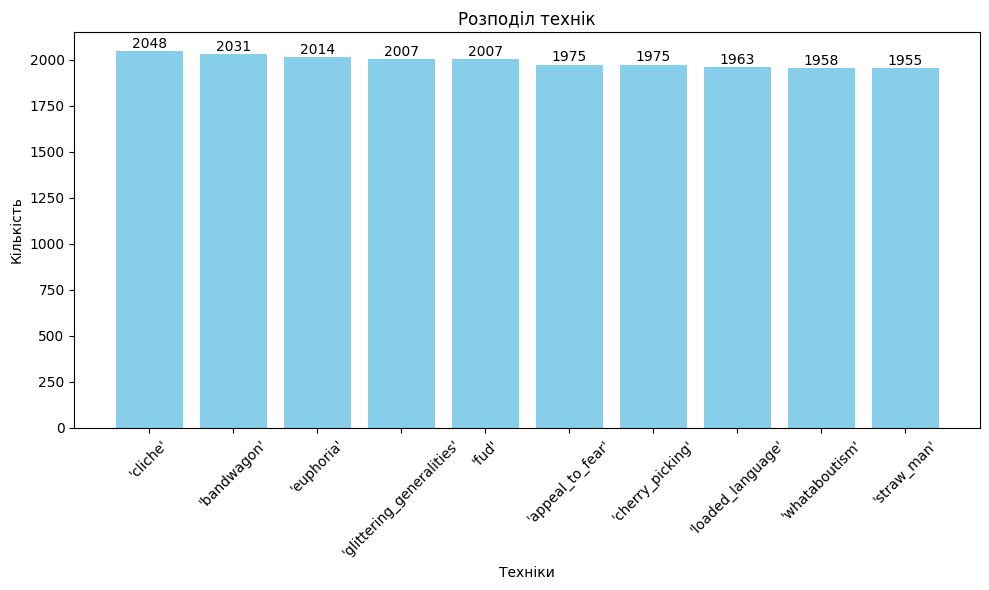

In [3]:
from collections import Counter

# Видалити квадратні дужки та розділити техніки
techniques_list = df['techniques'].str.strip('[]').str.split(', ')
# Зробити плоский список технік, видаливши зайві пробіли та символи нового рядка
flat_techniques = [technique.strip() for sublist in techniques_list for technique in sublist]

# Порахувати кількість кожної техніки
techniques_count = Counter(flat_techniques)
# Видалити порожнє значення та об'єднати повторювані значення
techniques_count.pop('', None)
# techniques_count['cherry_picking'] += techniques_count.pop('cherry-picking', 0)
# techniques_count['straw_man'] += techniques_count.pop('straw-man', 0)

techniques_df = pd.DataFrame(techniques_count.items(), columns=['Technique', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(techniques_df['Technique'], techniques_df['Count'], color='skyblue')
plt.xlabel('Техніки')
plt.ylabel('Кількість')
plt.title('Розподіл технік')
plt.xticks(rotation=45)
plt.tight_layout()

# Add values on top of the bars
for i, value in enumerate(techniques_df['Count']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

In [4]:
original_df = pd.read_parquet(RAW_DATA_FOLDER / 'techniques-classification.parquet')
original_df


,id,content,lang,manipulative,techniques,trigger_words
0,0bb0c7fa-101b-4583-a5f9-9d503339141c,Новий огляд мапи DeepState від російського вій...,uk,True,"[euphoria, loaded_language]",None
1,7159f802-6f99-4e9d-97bd-6f565a4a0fae,Недавно 95 квартал жёстко поглумился над русск...,ru,True,"[loaded_language, cherry_picking]",None
2,e6a427f1-211f-405f-bd8b-70798458d656,🤩\nТим часом йде евакуація Бєлгородського авто...,uk,True,"[loaded_language, euphoria]",None
3,1647a352-4cd3-40f6-bfa1-d87d42e34eea,В Україні найближчим часом мають намір посилит...,uk,False,None,None
4,9c01de00-841f-4b50-9407-104e9ffb03bf,"Расчёты 122-мм САУ 2С1 ""Гвоздика"" 132-й бригад...",ru,True,[loaded_language],None
...,...,...,...,...,...,...
3817,0e5dd135-ef41-48d3-b274-faedf3a2126c,🤭\nросія ставить ППО на дахах адмінбудівель\nр...,uk,True,"[loaded_language, euphoria]",None
3818,08e6772a-9793-4ec9-babd-2a9e0e8b31f9,"К слову, Бабий не просто «ларечник», а и челов...",ru,True,[loaded_language],None
3819,d7cfa984-46f2-450d-b4ec-28a0b5d93756,"Глава ФСБ Бортников ответил журналистам, почем...",ru,False,None,None
3820,4256b2b8-43bc-4d90-95c4-5fb25f1ab0e3,В ДНР завозили наркотики в бытовой технике\nОб...,ru,False,None,None


In [6]:
nonmanipulated_df = pd.read_csv(EXTERNAL_DATA_FOLDER / 'nonmanipulative_generated_texts.csv')
nonmanipulated_df

,id,content,lang,manipulative,techniques,trigger_words
0,beddc0f7d9ee4760832468aff2467a09,🏘️\nУ Львові відкрили перший в Україні музей в...,uk,False,NaN,NaN
1,4701e4e55752424dab2d79d5119b98ad,❗ Повідомлення з Харкова: Сильна хуртовина ус...,uk,False,NaN,NaN
2,e505bf9cdf0a485b853b09c5087de2a3,Засідання уряду: обговорення нових програм під...,uk,False,NaN,NaN
3,03c57eac457c4ee4b59c5aaa433e7d91,Центр досліджень української мови та культури ...,uk,False,NaN,NaN
4,3b69c5936abe463e8693fb5ce311b302,📌 Приклад: Оновлення системи електронного док...,uk,False,NaN,NaN
...,...,...,...,...,...,...
1981,5ffc46ed5cc04ea49541c7db692509b7,Итоги рабочей поездки в село Верхние Дубровцы:...,ru,False,NaN,NaN
1982,d4ffecd7a36443749d1f27e892a9d774,⚡️\nРосстат опубликовал данные о средней зарпл...,ru,False,NaN,NaN
1983,36f2e24298cf4c3692cb7ac12968e90d,Власти Новосибирской области планируют вложить...,ru,False,NaN,NaN
1984,8f1d7c6084ff4a0eb38c0df0ee603a4f,"Слушайте, сегодня утром читал, что в Бразилии...",ru,False,NaN,NaN


In [7]:
combined_df = pd.concat([df, nonmanipulated_df, original_df], ignore_index=True)
combined_df

,id,content,lang,manipulative,techniques,trigger_words
0,7d4cd781-574c-4493-aa18-494a85ef2ac9,"Они уже здесь. Тихо подкрадываются, маскируяс...",ru,True,['appeal_to_fear'],['враг' 'угроза' 'дети' 'преступность' 'деваль...
1,338246ff-6bb8-432e-9a63-880a1e13a64b,⚠ **ВНИМАНИЕ! НАША СТРАНА В ОПАСНОСТІ!** ⚠\n\n...,ru,True,"['glittering_generalities', 'appeal_to_fear', ...",['опасность' 'ворог' 'зла' 'хаос' 'беззаконня'...
2,b28dbb0a-0e44-40dc-9f00-b7fe66c92608,Вже мільйони українців відчули на собі руйнівн...,uk,True,"['bandwagon', 'cliche', 'cherry_picking']","['війна' 'діти' ""обов'язок"" 'перемога' 'ЗСУ' '..."
3,1bad7927-fac5-427b-9afb-7dca2eb0dce9,Вже всі розуміють: війна затягується. **Все н...,uk,True,"['fud', 'cliche', 'bandwagon']",['втрати' 'резервів' 'пропаганда' 'тікатимуть'...
4,7ebce36f-f4e7-48fd-999c-360988dfeed4,"Слухи о том, что мобилизация в Украине идет пл...",ru,True,"['cherry_picking', 'whataboutism', 'cliche']",['мобилизация' 'война' 'предатели' 'Россия' 'З...
...,...,...,...,...,...,...
15803,0e5dd135-ef41-48d3-b274-faedf3a2126c,🤭\nросія ставить ППО на дахах адмінбудівель\nр...,uk,True,"[loaded_language, euphoria]",None
15804,08e6772a-9793-4ec9-babd-2a9e0e8b31f9,"К слову, Бабий не просто «ларечник», а и челов...",ru,True,[loaded_language],None
15805,d7cfa984-46f2-450d-b4ec-28a0b5d93756,"Глава ФСБ Бортников ответил журналистам, почем...",ru,False,None,None
15806,4256b2b8-43bc-4d90-95c4-5fb25f1ab0e3,В ДНР завозили наркотики в бытовой технике\nОб...,ru,False,None,None


In [8]:
# combined_df.to_csv(EXTERNAL_DATA_FOLDER / 'balanced_combined_techniques.csv', index=False)
combined_df.to_csv(EXTERNAL_DATA_FOLDER / 'balanced_combined_with_nonmanipulation.csv', index=False)

In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15808 entries, 0 to 15807
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             15808 non-null  object
 1   content        15808 non-null  object
 2   lang           15808 non-null  object
 3   manipulative   15808 non-null  bool  
 4   techniques     12589 non-null  object
 5   trigger_words  10000 non-null  object
dtypes: bool(1), object(5)
memory usage: 633.1+ KB
